<h1 style="color:black;text-align:center;font-size:300%;font-family:verdana;">
Exploration + Data preprocessing
</h1>


In [1]:
import  pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from datetime import datetime

In [2]:
data=pd.read_excel("WorkDB-28.02.25.xlsx")

In [3]:
data.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,Paris,Rome,1,1,15:45:00,2025-01-03 00:00:00,17:50:00,10:05:00,2025-02-03 00:00:00,12:20:00,...,nonstop,NaN,NaN,1.0,0.0,1332,28/02/2025,Momondo,125,135
1,Paris,Rome,1,1,07:40:00,2025-01-03 00:00:00,09:45:00,19:55:00,2025-02-03 00:00:00,11:40:00,...,1 stop,760.0,MPL,1.0,0.0,1247,28/02/2025,Momondo,125,945
2,Paris,Rome,1,1,15:45:00,2025-01-03 00:00:00,17:50:00,06:00:00,2025-02-03 00:00:00,08:15:00,...,nonstop,NaN,NaN,1.0,0.0,1332,28/02/2025,Momondo,125,135
3,Paris,Rome,1,1,06:55:00,2025-01-03 00:00:00,09:00:00,10:05:00,2025-02-03 00:00:00,12:20:00,...,nonstop,NaN,NaN,1.0,0.0,1332,28/02/2025,Momondo,125,135
4,Paris,Rome,1,1,06:55:00,2025-01-03 00:00:00,09:00:00,06:00:00,2025-02-03 00:00:00,08:15:00,...,nonstop,NaN,NaN,1.0,0.0,1332,28/02/2025,Momondo,125,135


In [4]:
#handle diffrent data formats
def parse_date(date):
    date_str = str(date)
    formats = [ '%d/%m/%Y','%Y-%m-%d','%Y-%d-%m','%Y-%m-%d %H:%M:%S', '%d/%m/%Y %H:%M:%S']
    for fmt in formats:
        try:
            return datetime.strptime(date_str, fmt)
        except ValueError:
            pass
            
    raise ValueError('no valid date format found')
data['Snapshot Time'] = data['Snapshot Time'].apply(parse_date)
data['Departure Date'] = data['Departure Date'].apply(parse_date)
data['Return Date'] = data['Return Date'].apply(parse_date)

In [5]:
unique_values = pd.concat([data['Return Airlines'], data['Onward Airlines']]).unique()
print(unique_values)
#remove non airlines:
strings_to_remove = ['Eurostar', 'FlixBus','Union Ivkoni','BlaBlaBus']
data = data[~data['Return Airlines'].str.contains('|'.join(strings_to_remove), na=False) & 
            ~data['Onward Airlines'].str.contains('|'.join(strings_to_remove), na=False)]


['Air France' 'Transavia France' 'Ryanair' 'Vueling' 'ITA Airways'
 'Wizz Air' 'Lufthansa' 'easyJet' 'Iberia' 'ITA Airways, easyJet'
 'British Airways' 'Jet2' 'Ryanair, ITA Airways' 'Wizz Air, Wizz Air'
 'Volotea' 'Wizz Air, Eurowings' 'Ryanair, easyJet' 'Ryanair, Vueling'
 'easyJet, Wizz Air' 'Eurowings' 'Wizz Air, Ryanair' 'KM Malta Airlines'
 'Wizz Air, Air Albania' 'Ryanair, Wizz Air' 'Ryanair, Aeroitalia'
 'Austrian Airlines' 'KLM' 'Scandinavian Airlines' 'Wizz Air, easyJet'
 'Transavia France, Wizz Air' 'Eurostar' 'Ryanair, Ryanair'
 'Vueling, easyJet' 'Vueling, Ryanair' 'Tunisair' 'ITA Airways, Ryanair'
 'easyJet, Ryanair' 'Aeroitalia, Ryanair' 'FlixBus' 'Union Ivkoni'
 'Norwegian' 'BlaBlaBus' 'Vueling, Wizz Air' 'ITA Airways, Wizz Air'
 'Norwegian, Ryanair' 'Vueling, Transavia France' 'easyJet, Eurowings'
 'easyJet, ITA Airways' 'easyJet, Volotea' 'Wizz Air, Aeroitalia' 'SWISS']


In [6]:
data.head()

,Origin,Destination,TTT,LOS,Departure Time,Departure Date,Arrival Time,Return Departure Time,Return Date,Return Arrival Time,...,Return Flight Connections,Return Connection Duration(min),Return Flight Connection Airport,Carry-ons,Checked Bags,Price(NIS),Snapshot Time,Site,Total Onward Flight Duration(min),Total Return Flight Duration(min)
0,Paris,Rome,1,1,15:45:00,2025-01-03,17:50:00,10:05:00,2025-02-03,12:20:00,...,nonstop,NaN,NaN,1.0,0.0,1332,2025-02-28,Momondo,125,135
1,Paris,Rome,1,1,07:40:00,2025-01-03,09:45:00,19:55:00,2025-02-03,11:40:00,...,1 stop,760.0,MPL,1.0,0.0,1247,2025-02-28,Momondo,125,945
2,Paris,Rome,1,1,15:45:00,2025-01-03,17:50:00,06:00:00,2025-02-03,08:15:00,...,nonstop,NaN,NaN,1.0,0.0,1332,2025-02-28,Momondo,125,135
3,Paris,Rome,1,1,06:55:00,2025-01-03,09:00:00,10:05:00,2025-02-03,12:20:00,...,nonstop,NaN,NaN,1.0,0.0,1332,2025-02-28,Momondo,125,135
4,Paris,Rome,1,1,06:55:00,2025-01-03,09:00:00,06:00:00,2025-02-03,08:15:00,...,nonstop,NaN,NaN,1.0,0.0,1332,2025-02-28,Momondo,125,135


In [7]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,179720,179721,179722,179723,179724,179725,179726,179727,179728,179729
Origin,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,Paris,...,London,London,London,London,London,London,London,London,London,London
Destination,Rome,Rome,Rome,Rome,Rome,Rome,Rome,Rome,Rome,Rome,...,Rome,Rome,Rome,Rome,Rome,Rome,Rome,Rome,Rome,Rome
TTT,1,1,1,1,1,1,1,1,1,1,...,5,5,5,5,5,5,5,5,5,5
LOS,1,1,1,1,1,1,1,1,1,1,...,3,3,3,3,3,3,3,3,3,3
Departure Time,15:45:00,07:40:00,15:45:00,06:55:00,06:55:00,13:45:00,13:45:00,20:40:00,20:40:00,15:45:00,...,06:45:00,09:20:00,18:20:00,09:05:00,06:15:00,16:35:00,10:25:00,16:35:00,16:10:00,18:20:00
Departure Date,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,2025-01-03 00:00:00,...,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00,2025-05-03 00:00:00
Arrival Time,17:50:00,09:45:00,17:50:00,09:00:00,09:00:00,15:50:00,15:50:00,22:45:00,22:45:00,17:50:00,...,10:15:00,12:50:00,21:45:00,12:35:00,09:40:00,20:05:00,13:50:00,20:05:00,19:35:00,21:45:00
Return Departure Time,10:05:00,19:55:00,06:00:00,10:05:00,06:00:00,06:00:00,10:05:00,06:00:00,10:05:00,12:50:00,...,16:05:00,16:05:00,13:25:00,06:45:00,13:25:00,06:45:00,13:25:00,06:45:00,13:25:00,17:25:00
Return Date,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,2025-02-03 00:00:00,...,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00,2025-08-03 00:00:00
Return Arrival Time,12:20:00,11:40:00,08:15:00,12:20:00,08:15:00,08:15:00,12:20:00,08:15:00,12:20:00,15:00:00,...,17:50:00,17:50:00,15:20:00,08:35:00,15:20:00,08:35:00,15:20:00,08:35:00,15:20:00,19:10:00


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179504 entries, 0 to 179729
Data columns (total 29 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179504 non-null  object        
 1   Destination                        179504 non-null  object        
 2   TTT                                179504 non-null  int64         
 3   LOS                                179504 non-null  int64         
 4   Departure Time                     179504 non-null  object        
 5   Departure Date                     179504 non-null  datetime64[ns]
 6   Arrival Time                       179504 non-null  object        
 7   Return Departure Time              179504 non-null  object        
 8   Return Date                        179504 non-null  datetime64[ns]
 9   Return Arrival Time                179504 non-null  object        
 10  Onward Departure Airport 

In [9]:
print(data.columns)

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)'],
      dtype='object')


In [10]:
data.describe().T

,count,mean,min,25%,50%,75%,max,std
TTT,179504.0,15.223204,1.0,8.0,15.0,23.0,30.0,8.713007
LOS,179504.0,3.003148,1.0,2.0,3.0,4.0,5.0,1.414732
Departure Date,179504,2025-04-25 12:59:10.744273152,2025-01-03 00:00:00,2025-03-17 00:00:00,2025-03-24 00:00:00,2025-05-03 00:00:00,2025-12-03 00:00:00,NaN
Return Date,179504,2025-04-28 18:16:00.246011392,2025-01-04 00:00:00,2025-03-18 00:00:00,2025-03-25 00:00:00,2025-05-03 00:00:00,2025-12-03 00:00:00,NaN
Onward Connection Duration(min),1825.0,129.652055,40.0,55.0,90.0,120.0,1870.0,172.706865
Return Connection Duration(min),1847.0,129.090417,45.0,55.0,90.0,125.0,1355.0,164.738412
Carry-ons,179499.0,0.1117,0.0,0.0,0.0,0.0,1.0,0.314998
Checked Bags,179500.0,0.097153,0.0,0.0,0.0,0.0,2.0,0.297331
Price(NIS),179504.0,576.385813,122.0,390.0,541.0,701.0,2509.0,258.456373
Snapshot Time,179504,2025-02-28 00:00:00,2025-02-28 00:00:00,2025-02-28 00:00:00,2025-02-28 00:00:00,2025-02-28 00:00:00,2025-02-28 00:00:00,NaN


In [11]:
data.isnull().sum()

Origin                                    0
Destination                               0
TTT                                       0
LOS                                       0
Departure Time                            0
Departure Date                            0
Arrival Time                              0
Return Departure Time                     0
Return Date                               0
Return Arrival Time                       0
Onward Departure Airport                  0
Onward Arrival Airport                    0
Return Departure Airport                  0
Return Arrival Airport                    0
Onward Airlines                           0
Return Airlines                           0
Onward Flight Connections                 0
Onward Connection Duration(min)      177679
Onward Flight Connection Airport     177679
Return Flight Connections                 0
Return Connection Duration(min)      177657
Return Flight Connection Airport     177657
Carry-ons                       

Most flights do not have connections, which explains why most of the missing values are in the following fields:

- **Onward Connection Duration**
- **Onward Flight Connection Airport**
- **Return Connection Duration**
- **Return Flight Connection Airport**

### <u>Visualization</u>

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


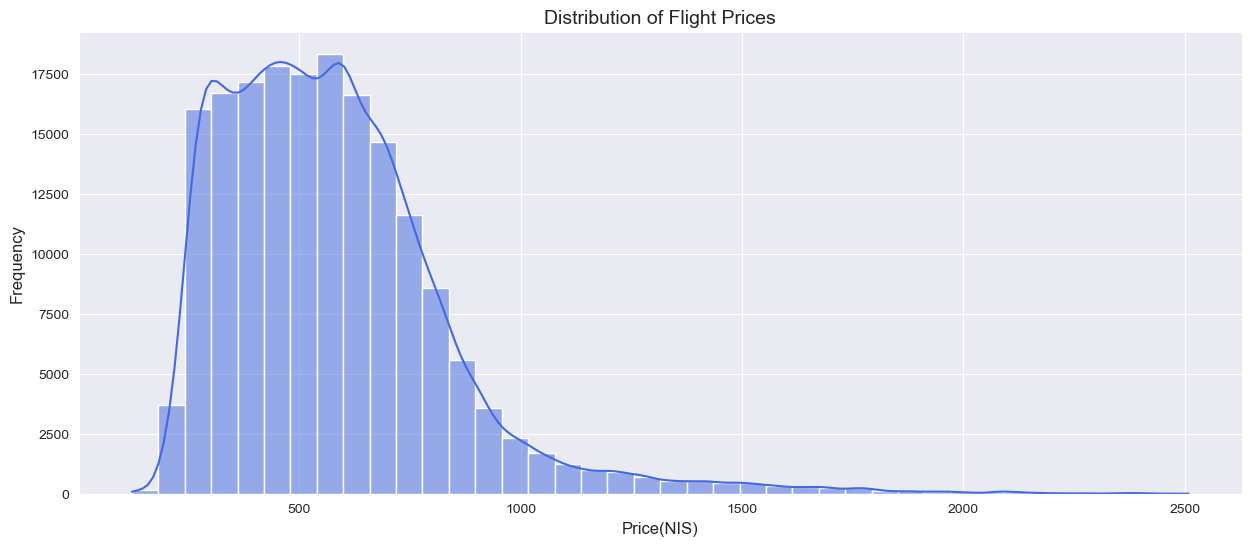

In [12]:
plt.figure(figsize=(15, 6))
sns.histplot(data["Price(NIS)"], bins=40, kde=True, color="royalblue")
plt.title("Distribution of Flight Prices", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

plt.show()

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


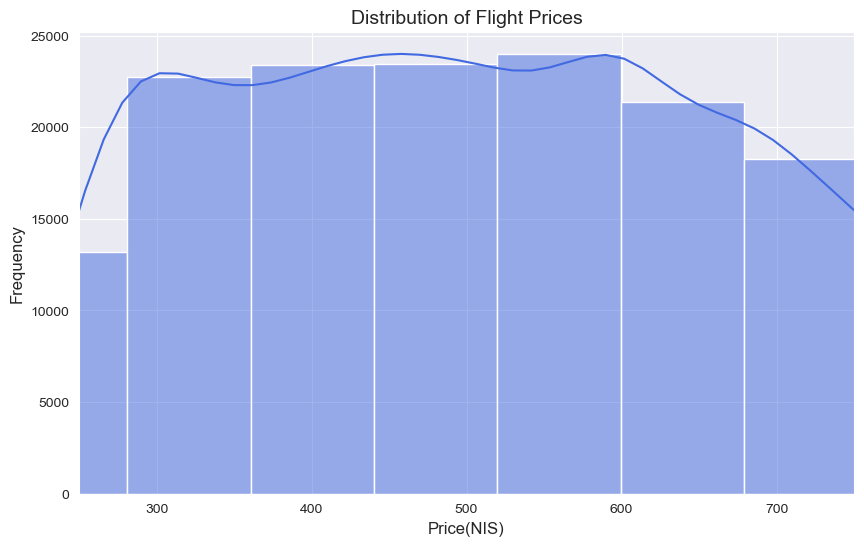

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Price(NIS)"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Flight Prices", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(250, 750)
plt.show()

# Conclusions on Flight Price Distribution
- **Right-Skewed Distribution** - Most flights are priced between 250(NIS)-750(NIS), but there are some expensive flights creating a long right tail.
The mean price is likely higher than the median due to a few very high-priced flights.
- **3 Peaks Around $300-$600** - This is the most common price range, possibly representing standard commercial flights. The different peaks may be caused by small gap in prices around weekend or time of arrival (night or morning) or diffrent sites.
- **High-Price Outliers** - Flights priced above 1500(NIS)-2000(NIS) may include business class, last-minute bookings, or rare destinations.
- **Normalization Consideration**
Applying log(price) can reduce the impact of extreme values and improve statistical analysis.



### <u>Removing Outliers Using Tukey's Method</u>

Original data size: (179504, 31)
Filtered data size: (173828, 31)
Percentage of removed rows: 3.16%


c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


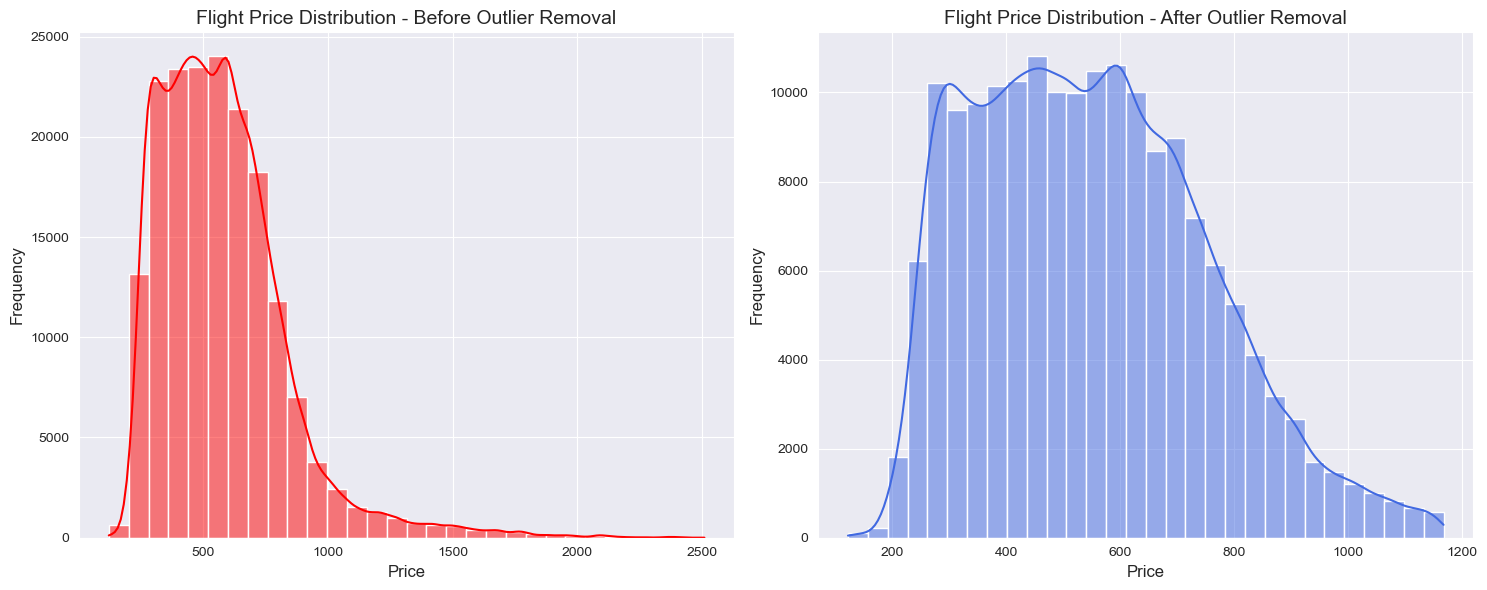

In [69]:

# Calculate quartiles and IQR for the 'Price' column
Q1 = data["Price(NIS)"].quantile(0.25)
Q3 = data["Price(NIS)"].quantile(0.75)
IQR = Q3 - Q1

# Compute the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Store the original data before filtering
original_data = data.copy()

# ✅ Keep all columns, remove only outliers from 'Price'
filtered_data = data[(data["Price(NIS)"] >= lower_bound) & (data["Price(NIS)"] <= upper_bound)].copy()

# Print how many rows were removed
print(f"Original data size: {data.shape}")
print(f"Filtered data size: {filtered_data.shape}")
removed_percentage = (1 - (filtered_data.shape[0] / data.shape[0])) * 100
print(f"Percentage of removed rows: {removed_percentage:.2f}%")

# Create side-by-side histograms to compare distributions
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram before removing outliers
sns.histplot(original_data["Price(NIS)"], bins=30, kde=True, color="red", ax=axes[0])
axes[0].set_title("Flight Price Distribution - Before Outlier Removal", fontsize=14)
axes[0].set_xlabel("Price", fontsize=12)
axes[0].set_ylabel("Frequency", fontsize=12)

# Histogram after removing outliers
sns.histplot(filtered_data["Price(NIS)"], bins=30, kde=True, color="royalblue", ax=axes[1])
axes[1].set_title("Flight Price Distribution - After Outlier Removal", fontsize=14)
axes[1].set_xlabel("Price", fontsize=12)
axes[1].set_ylabel("Frequency", fontsize=12)

# Display the plots
plt.tight_layout()
plt.show()



### Key Conclusions on Outlier Removal

- **Before removal:** Prices were **right-skewed**, with extreme high values above $1500.  
- **After removal:** The distribution became **more balanced**, focusing on the common price range ($250-$1000).  
- **Impact:** Outlier removal **reduces bias** and makes the data **more suitable for analysis**. 
- **Peaks:** The 3 peaks of prices are more visible now: 250-300 NIS, 450 NIS, 650 NIS.


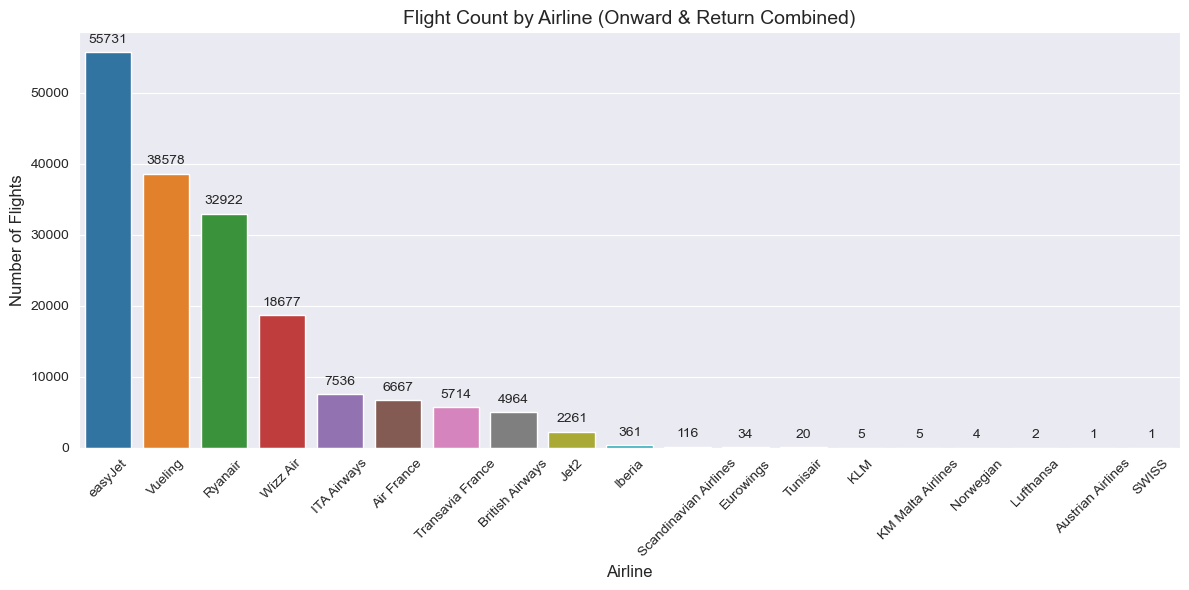

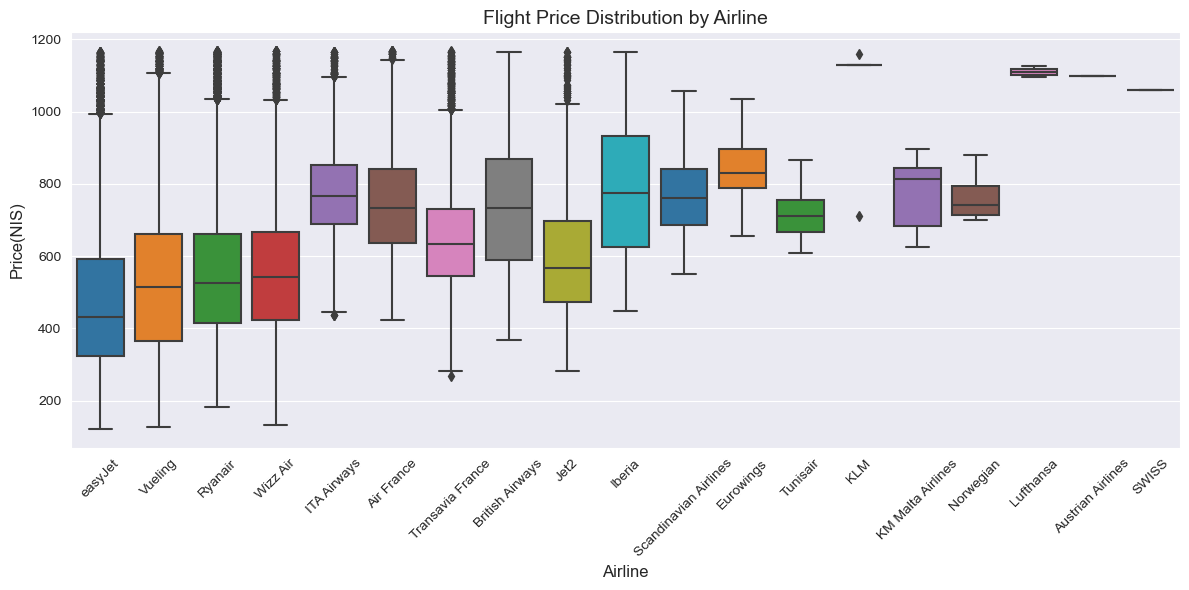

In [70]:
# 1. Remove duplicates, so that each flight is counted only once per airline
filtered_data["Airline"] = filtered_data["Onward Airlines"].combine_first(filtered_data["Return Airlines"])

# 2. Remove rows where multiple airlines are listed in a single row
filtered_data = filtered_data[~filtered_data["Airline"].str.contains(",")]


flight_counts = filtered_data['Airline'].value_counts().sort_values(ascending=False)
sorted_airlines_countplot = flight_counts.index

# 3. Create the countplot for the single airline per row
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=filtered_data, x="Airline", palette="tab10",order=sorted_airlines_countplot)

# 4. Add labels for each bar with the number of flights
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                xytext=(0, 9),  # 9 points vertical offset
                textcoords='offset points',
                ha='center', va='center')

# Set the title and labels for the countplot
plt.title("Flight Count by Airline (Onward & Return Combined)", fontsize=14)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Number of Flights", fontsize=12)
plt.xticks(rotation=45)

# Adjust the layout to avoid clipping labels
plt.tight_layout()
plt.show()

# 5. Plotting the distribution of prices by Airline
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x="Airline", y="Price(NIS)", palette="tab10",order=sorted_airlines_countplot)

# Set the title and labels for the price distribution plot
plt.title("Flight Price Distribution by Airline", fontsize=14)
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Price(NIS)", fontsize=12)
plt.xticks(rotation=45)

# Adjust the layout to avoid clipping labels
plt.tight_layout()
plt.show()


### Conclusions

1. **Flight Count by Airline**:
   - **easyJet** has the highest number of flights, with nearly **55K flights**, significantly outperforming other airlines.
   - **Ryanair** and **Vueling** follow, but with a noticeable gap from Wizz Air.
   - Other airlines  have considerably fewer flights, indicating a smaller presence in the dataset.
   - We can devide the flight frequency to 3 main groups: 15K+ flights, 2K-15K flights and less than 2K flights. when in the first group we have only low-cost companies.

2. **Flight Price Distribution by Airline**:
   - **easyJet**, **Vueling**, **Wizz Air** and **Ryanair** have a similar price range, with **easyJet** showing a slightly lower price midean.
   - from **ITA Airways** to **Eurowings** we can see slightly higer prices and smaller distirbution.
   - **Iberia**, **Scandinavian Airlines** and **Eurowings** have narrower price distributions and no outlayers, suggesting less variation in pricing.
   - In the second group the low-cost companies **Transavia** and **Jet2** offer more attractive prices than other companies in the same group.


### Summary:
   Frequently flying companies, show greater price distribution, while having wider outlayers. the most frequently flying companies are LowCost, which may indicate on the algo in which the flights are showen to the customer: customers who searches for flights on there websites are looking for the cheaper alternatives. with that said, the algo still offers some more expensive airlines.


c:\Users\andri\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


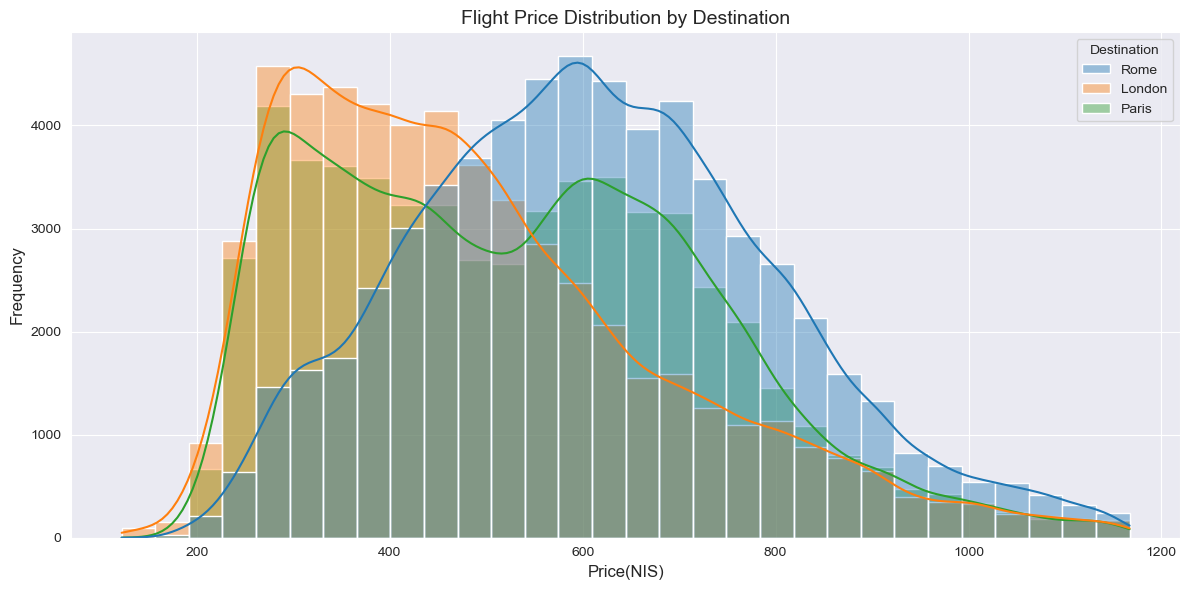

In [71]:
# 1. Create a histogram of flight prices by destination
plt.figure(figsize=(12, 6))
sns.histplot(data=filtered_data, x="Price(NIS)", hue="Destination", bins=30, kde=True, palette="tab10", alpha=0.4)

# 2. Set the title and labels for the histogram
plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Price(NIS)", fontsize=12)
plt.ylabel("Frequency", fontsize=12)

# 3. Display the plot
plt.tight_layout()
plt.show()


- **Price Distribution Comparison**: The graph shows a comparison of flight prices between Rome, London and Paris. 
- **Flight Prices in Rome**: The distribution resembles typical normal distribution with another small peak at slightli higher prices.
- **Flight Prices in London**: The distribution is more concentrated around cheaper prices, with a higher frequency of flights in the 300-600 range.
- **Higher Prices for Paris**: Paris has a diffrent distirbution that shows 2 major peaks in prices around 250 NIS and 650 NIS, it leans towards cheaper flights.
- **Price Trends**: Both destinations show a decreasing trend in frequency as prices increase, with diffrent price peaks. 




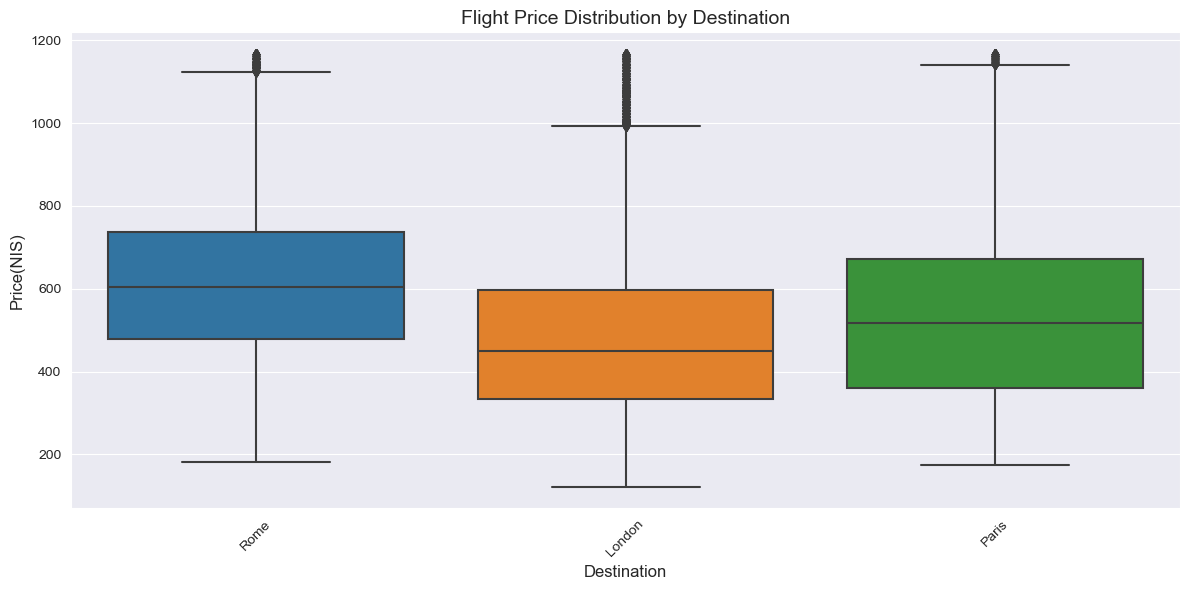

In [72]:
# Create the boxplot for flight prices by destination
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x="Destination", y="Price(NIS)", palette="tab10")

# Adding titles and labels
plt.title("Flight Price Distribution by Destination", fontsize=14)
plt.xlabel("Destination", fontsize=12)
plt.ylabel("Price(NIS)", fontsize=12)

# Rotate the x labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


### Flight Price Distribution by Destination

- **Price Range**:  
  The prices for flights to Rome are relatively higher compared to London and Paris. The interquartile range (IQR) for Paris and London is slightly wider, indicating more variability in prices. 

- **Outliers**:  
  Both destinations have outliers, but the outliers for London seem to be more extreme, suggesting that there are some significantly expensive flights for this destination.

- **Median**:  
  The median price for flights to Rome is slightly above 600 NIS, while the median for London is closer to 450, meaning that London tends to have cheaper flights in comparison.

***Possible Explanations***:
- Paris and London have multiple major airports with many airlines and routes, creating more competition, leading to price fluctuations. Rome, with only one major airport, has fewer direct flights, leading to more stable pricing.
- London has cooler weather, causing less demand in the shoulder season. Paris attracts tourists for cultural experiences year-round, while Rome offers a steady flow of visitors interested in historical sites during the spring, contributing to more stable prices.
- Paris and London host numerous cultural events during spring, increasing demand for flights and causing temporary price hikes. Rome, on the other hand, experiences stable demand due to religious and historical site visits, leading to more consistent pricing.


In [73]:
print(data.columns)

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Total Flight Duration(min)',
       'Total Connection Duration(min)'],
      dtype='object')


In [74]:
filtered_data['Total Onward Flight Duration(min)'] = pd.to_numeric(filtered_data['Total Onward Flight Duration(min)'], errors='coerce')
filtered_data['Total Return Flight Duration(min)'] = pd.to_numeric(filtered_data['Total Return Flight Duration(min)'], errors='coerce')

In [75]:
filtered_data['Total Flight Duration(min)'] = filtered_data['Total Onward Flight Duration(min)'] + filtered_data['Total Return Flight Duration(min)']

# Combine Connection Durations
filtered_data['Total Connection Duration(min)'] = filtered_data['Onward Connection Duration(min)'] + filtered_data['Return Connection Duration(min)']


In [76]:
nofnull=data['Total Connection Duration(min)'].notnull().sum()
nofrows=data.shape[0]
percent_f_conection=(nofnull/nofrows)*100
print(percent_f_conection)

0.04958106783135752


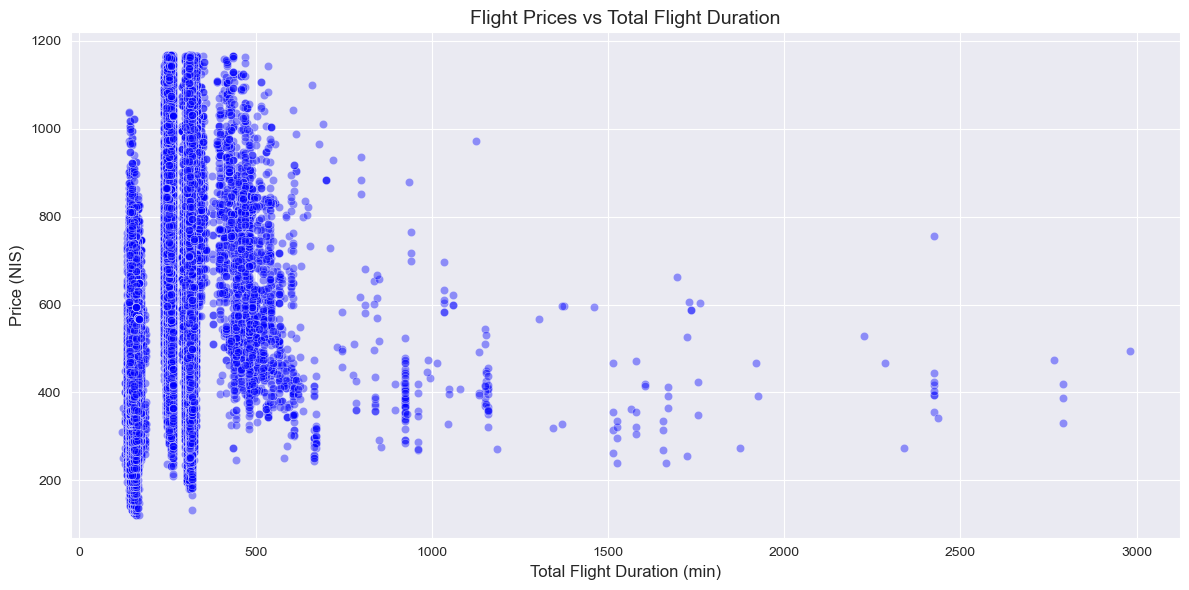

In [77]:
# Plot 1: Distribution of Flight Prices by Total Flight Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='Total Flight Duration(min)', y='Price(NIS)', color='blue',alpha=0.4)
plt.title("Flight Prices vs Total Flight Duration", fontsize=14)
plt.xlabel("Total Flight Duration (min)", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.tight_layout()
plt.show()






c:\Users\andri\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


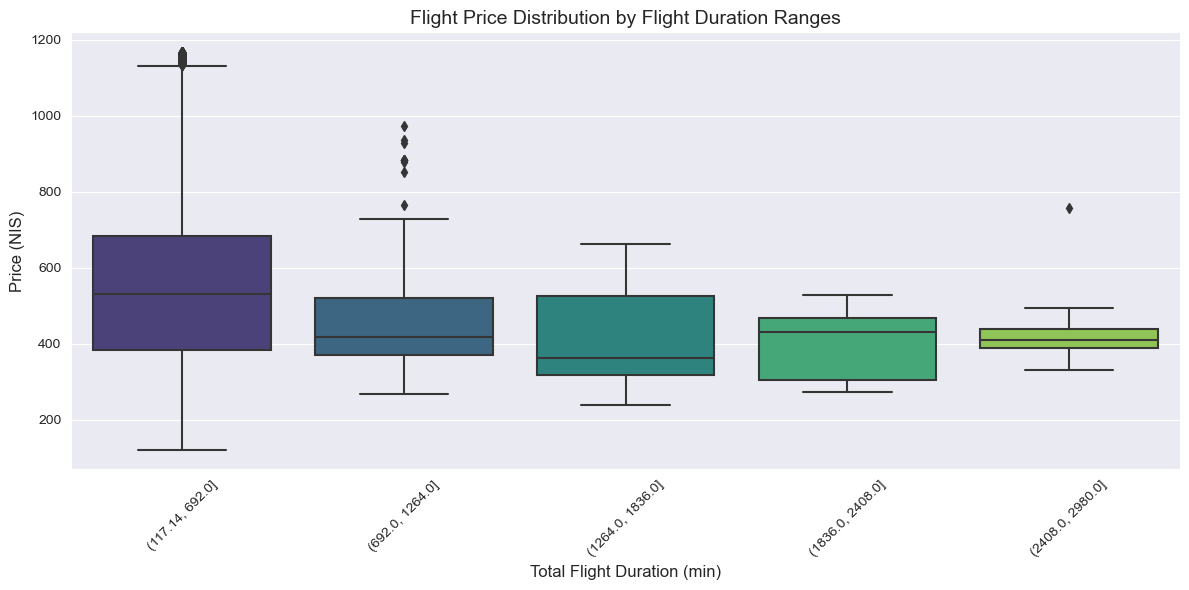

In [78]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x=pd.cut(filtered_data['Total Flight Duration(min)'], bins=5), y='Price(NIS)', palette='viridis')
plt.title("Flight Price Distribution by Flight Duration Ranges", fontsize=14)
plt.xlabel("Total Flight Duration (min)", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

KeyboardInterrupt: 

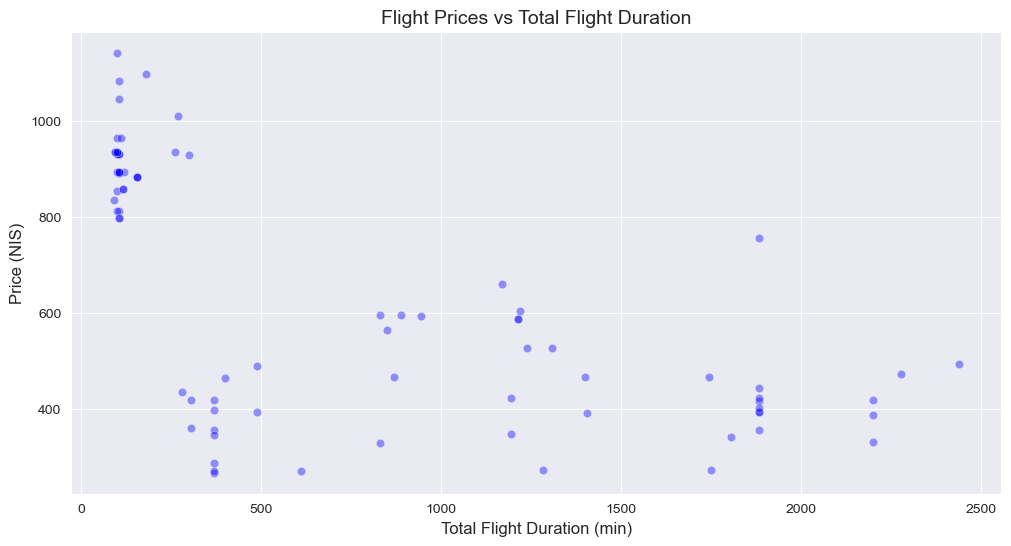

In [79]:
# Plot 2: Distribution of Flight Prices by Connection Duration
plt.figure(figsize=(12, 6))
sns.scatterplot(data=filtered_data, x='Total Connection Duration(min)', y='Price(NIS)', color='blue',alpha=0.4)
plt.title("Flight Prices vs Total Flight Duration", fontsize=14)
plt.xlabel("Total Flight Duration (min)", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.tight_layout()
plt.show()

c:\Users\andri\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


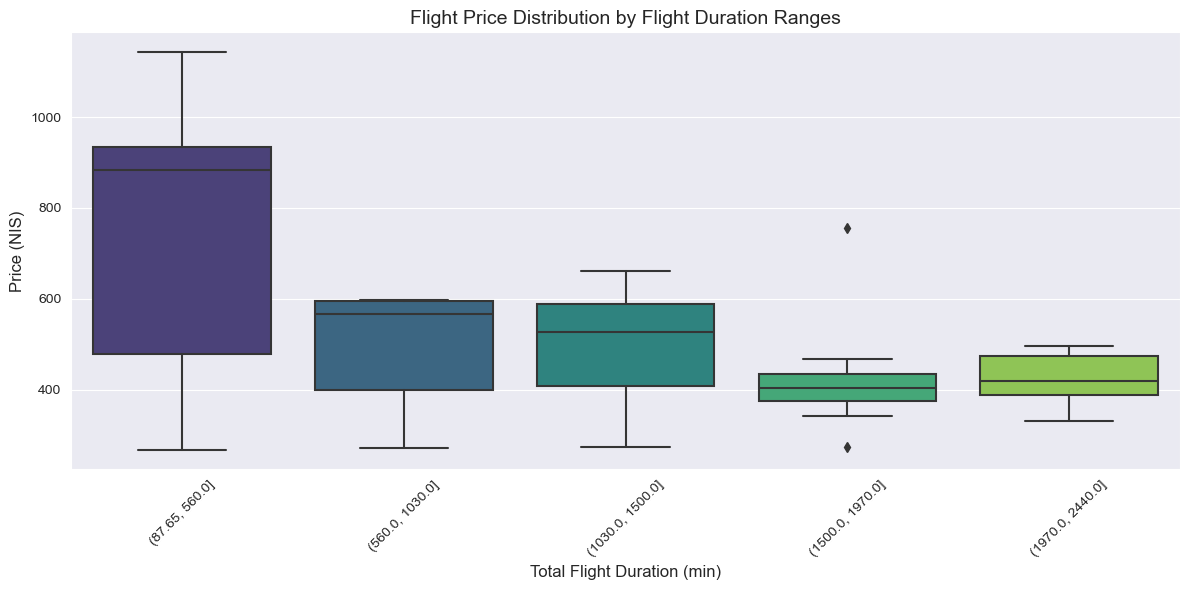

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x=pd.cut(filtered_data['Total Connection Duration(min)'], bins=5), y='Price(NIS)', palette='viridis')
plt.title("Flight Price Distribution by Flight Duration Ranges", fontsize=14)
plt.xlabel("Total Flight Duration (min)", fontsize=12)
plt.ylabel("Price (NIS)", fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Flight Price VS Flight & Connection Time 

- As the flight is shorter the more higher the price and the IQR, still the median price is higher.
- Above 1800 min (30 hrs) flight time the prices go higher. 
- As the connection time is shorter the proces are higher.

**Conclusion:**
- There are few flights with connnections, due to the short flight time between these destanations (0.049% flights with connection) 




In [96]:
filtered_data.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Departure Time',
       'Departure Date', 'Arrival Time', 'Return Departure Time',
       'Return Date', 'Return Arrival Time', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Airlines', 'Return Airlines',
       'Onward Flight Connections', 'Onward Connection Duration(min)',
       'Onward Flight Connection Airport', 'Return Flight Connections',
       'Return Connection Duration(min)', 'Return Flight Connection Airport',
       'Carry-ons', 'Checked Bags', 'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Total Flight Duration(min)',
       'Total Connection Duration(min)', 'Airline'],
      dtype='object')

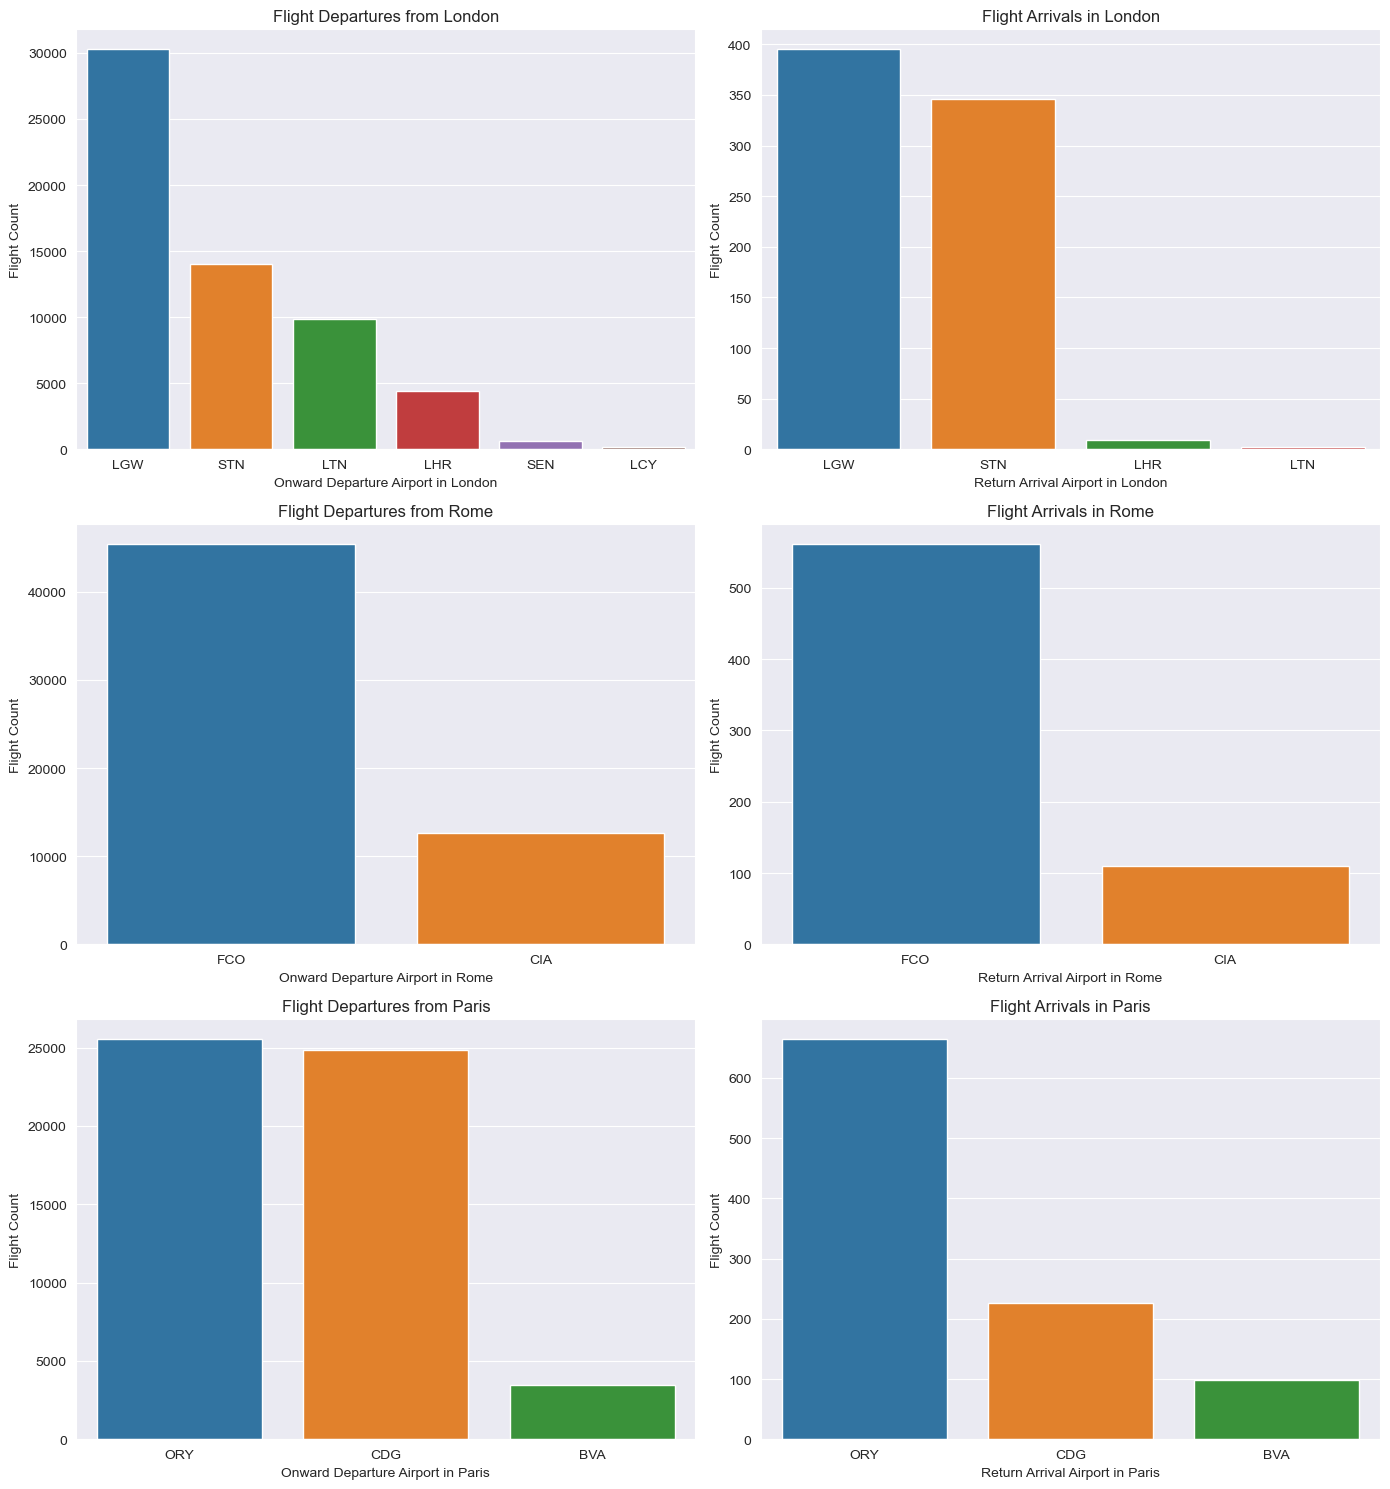

In [102]:
london_airports = ['LHR', 'LGW', 'STN', 'LTN', 'LCY', 'SEN']
rome_airports = ['FCO', 'CIA']
paris_airports = ['CDG', 'ORY', 'BVA']
# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
# Function to create bar plots
def create_bar_plot(data, city, airport_col, title, ax):
    subset_data = data[data[airport_col].isin(city)]
    flight_counts = subset_data[airport_col].value_counts().reset_index()
    flight_counts.columns = [airport_col, 'Flight Count']
    sns.barplot(data=flight_counts, x=airport_col, y='Flight Count', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Flight Count")

# Plot departures from London (Only airports in London)
create_bar_plot(filtered_data[filtered_data['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0])

# Plot arrivals in London (Only airports in London)
create_bar_plot(filtered_data[filtered_data['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1])

# Plot departures from Rome (Only airports in Rome)
create_bar_plot(filtered_data[filtered_data['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0])

# Plot arrivals in Rome (Only airports in Rome)
create_bar_plot(filtered_data[filtered_data['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1])

# Plot departures from Paris (Only airports in Paris)
create_bar_plot(filtered_data[filtered_data['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0])

# Plot arrivals in Paris (Only airports in Paris)
create_bar_plot(filtered_data[filtered_data['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

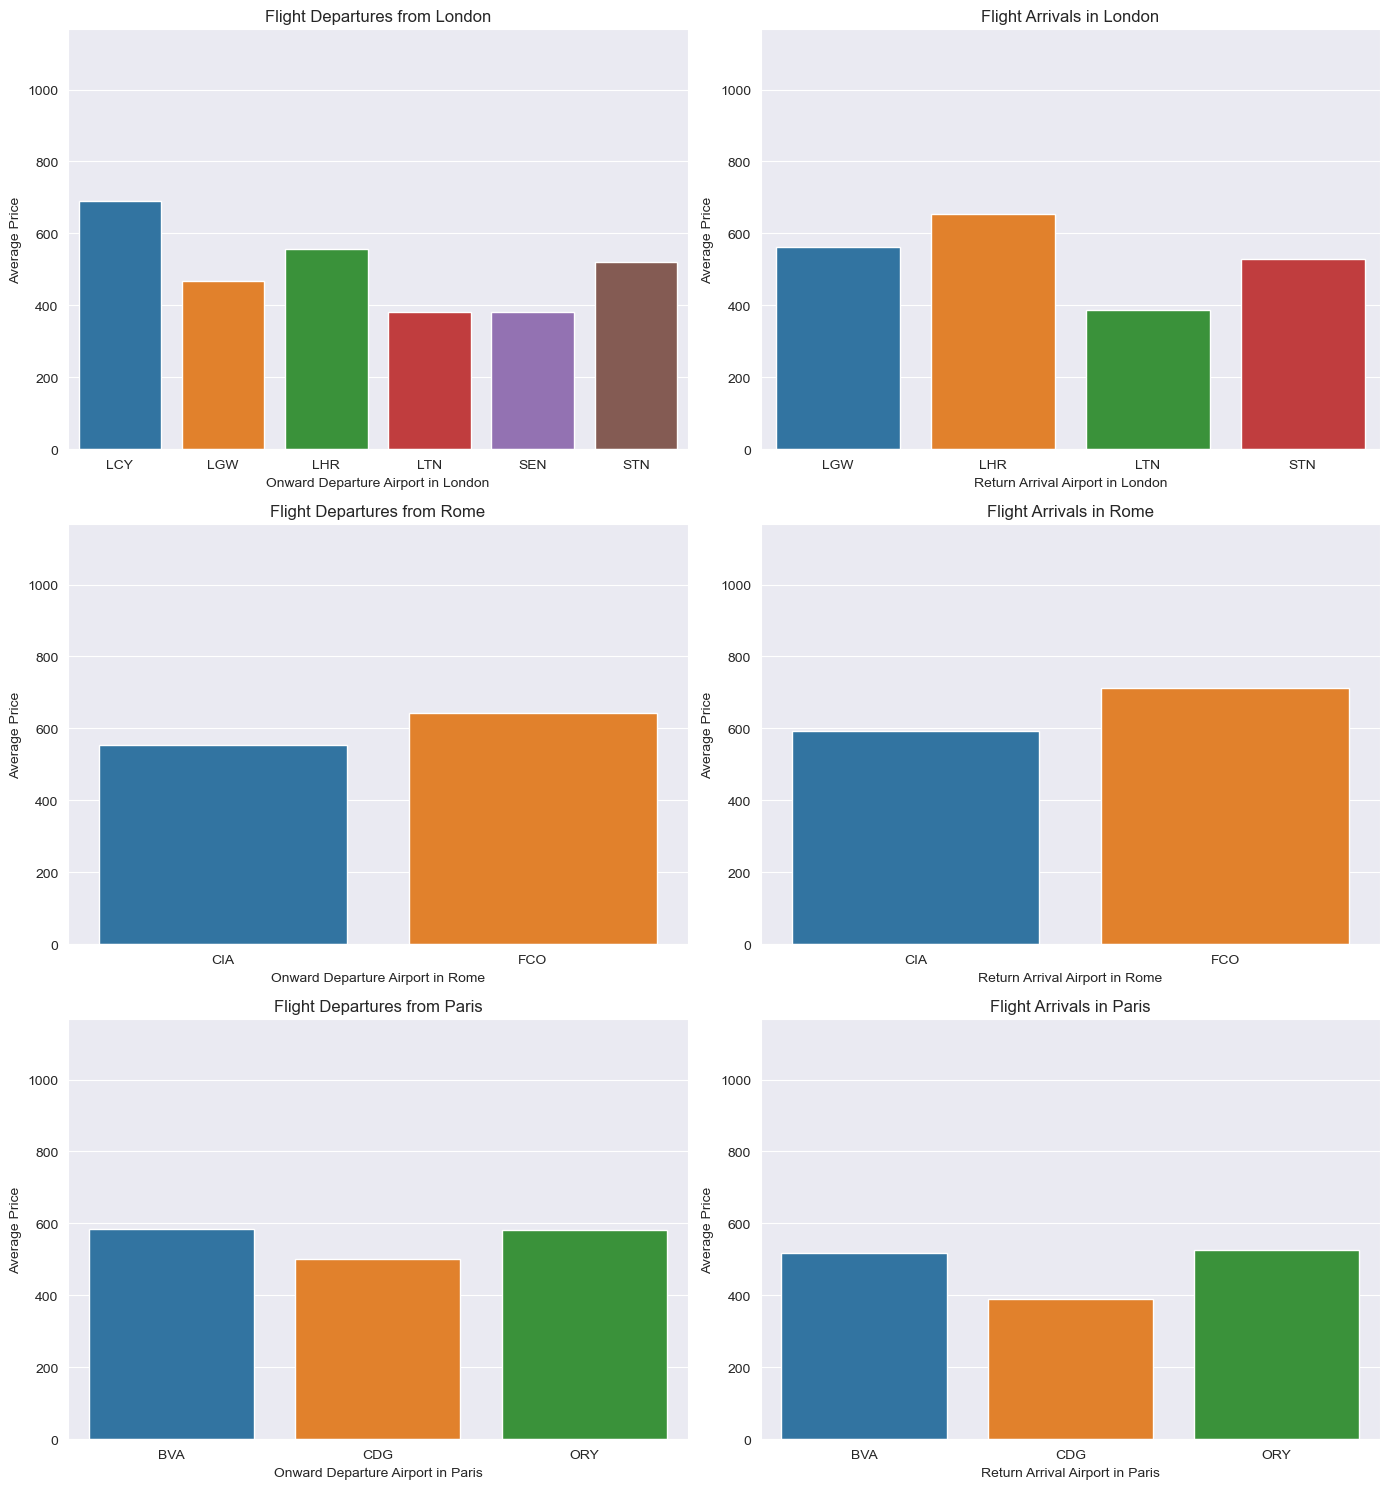

In [ ]:



# Determine common y-axis limits
max_price = filtered_data['Price(NIS)'].max()

# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

def create_bar_plot(data, city, airport_col, title, ax):
    subset_data = data[data[airport_col].isin(city)]
    avg_prices = subset_data.groupby(airport_col).agg({'Price(NIS)': 'mean'}).reset_index()
    sns.barplot(data=avg_prices, x=airport_col, y='Price(NIS)', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Average Price")
    ax.set_ylim(0, max_price)

    # Plot departures from London (Only airports in London)
create_bar_plot(filtered_data[filtered_data['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0])

# Plot arrivals in London (Only airports in London)
create_bar_plot(filtered_data[filtered_data['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1])

# Plot departures from Rome (Only airports in Rome)
create_bar_plot(filtered_data[filtered_data['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0])

# Plot arrivals in Rome (Only airports in Rome)
create_bar_plot(filtered_data[filtered_data['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1])

# Plot departures from Paris (Only airports in Paris)
create_bar_plot(filtered_data[filtered_data['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0])

# Plot arrivals in Paris (Only airports in Paris)
create_bar_plot(filtered_data[filtered_data['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

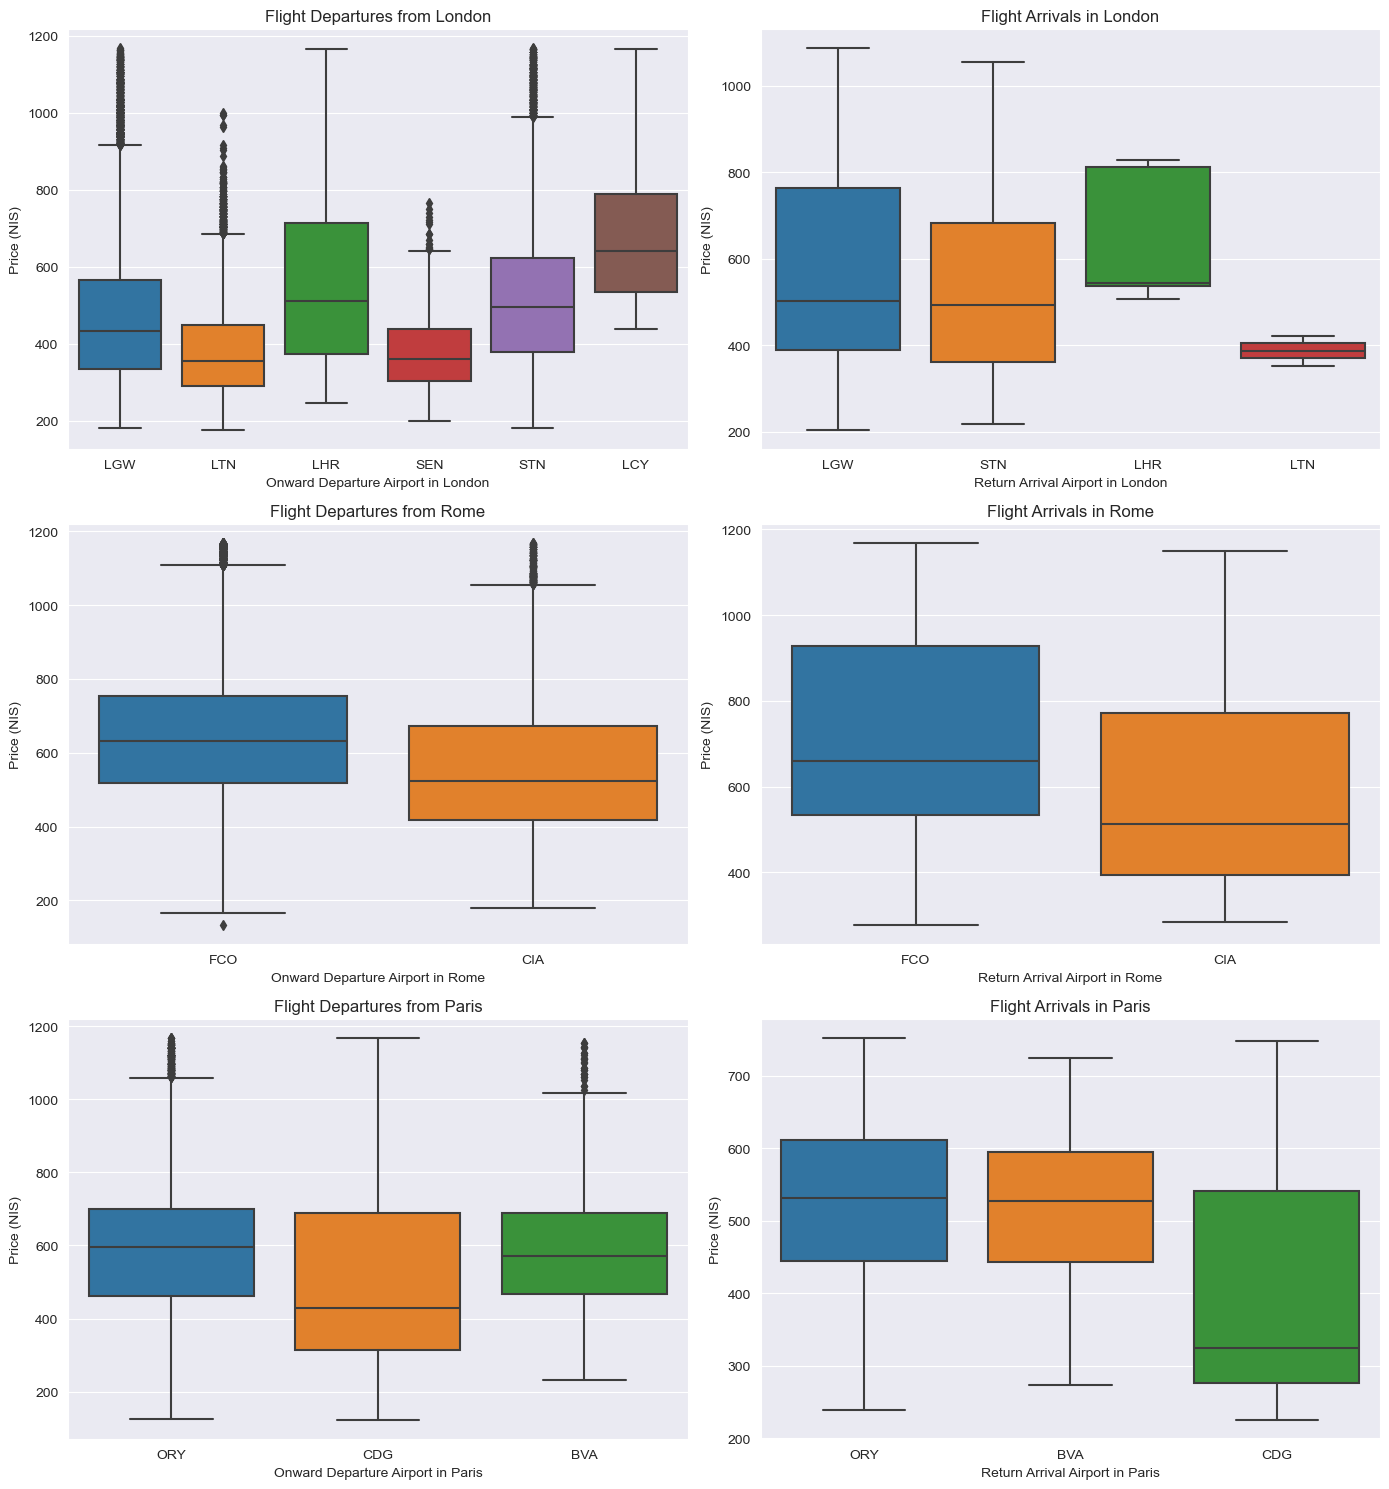

In [101]:
# Create a figure with 6 subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

# Function to create box plots
def create_box_plot(data, city, airport_col, title, ax):
    subset_data = data[data[airport_col].isin(city)]
    sns.boxplot(data=subset_data, x=airport_col, y='Price(NIS)', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(f"{airport_col} in {title.split()[-1]}")
    ax.set_ylabel("Price (NIS)")

# Plot departures from London (Only airports in London)
create_box_plot(filtered_data[filtered_data['Origin'] == 'London'], london_airports, 'Onward Departure Airport', 'Flight Departures from London', axes[0, 0])

# Plot arrivals in London (Only airports in London)
create_box_plot(filtered_data[filtered_data['Destination'] == 'London'], london_airports, 'Return Arrival Airport', 'Flight Arrivals in London', axes[0, 1])

# Plot departures from Rome (Only airports in Rome)
create_box_plot(filtered_data[filtered_data['Origin'] == 'Rome'], rome_airports, 'Onward Departure Airport', 'Flight Departures from Rome', axes[1, 0])

# Plot arrivals in Rome (Only airports in Rome)
create_box_plot(filtered_data[filtered_data['Destination'] == 'Rome'], rome_airports, 'Return Arrival Airport', 'Flight Arrivals in Rome', axes[1, 1])

# Plot departures from Paris (Only airports in Paris)
create_box_plot(filtered_data[filtered_data['Origin'] == 'Paris'], paris_airports, 'Onward Departure Airport', 'Flight Departures from Paris', axes[2, 0])

# Plot arrivals in Paris (Only airports in Paris)
create_box_plot(filtered_data[filtered_data['Destination'] == 'Paris'], paris_airports, 'Return Arrival Airport', 'Flight Arrivals in Paris', axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

## Flight Price Analysis
needs to be decided!!!!!!!!!!!!!!!!!!!!!!!!

In [105]:
#add information about each airport:
airports_info = {
    'London': {
        'Heathrow': {
            'code': 'LHR',
            'distance_from_city_center(km)': '23',
            'home_airline': 'British Airways',
            'flight_types': 'International, domestic, European',
            'popularity': 'Busiest airport in the UK',
        },
        'Gatwick': {
            'code': 'LGW',
            'distance_from_city_center(km)': '45',
            'home_airline': 'easyJet ,British Airways',
            'flight_types': 'International, European, Long-haul',
            'popularity': 'Second busiest airport in London',
        },
        'Stansted': {
            'code': 'STN',
            'distance_from_city_center(km)': '64',
            'home_airline': 'Ryanair',
            'flight_types': 'Primarily European, some international',
            'popularity': 'Popular for low-cost carriers, especially Ryanair',
        },
        'Luton': {
            'code': 'LTN',
            'distance_from_city_center(km)': '56',
            'home_airline': 'easyJet, Wizz Air',
            'flight_types': 'Primarily European, some international',
            'popularity': 'Popular with budget airlines',
            
        },
        'City': {
            'code': 'LCY',
            'distance_from_city_center(km)': '11',
            'home_airline': 'British Airways',
            'flight_types': 'Primarily European, some domestic',
            'popularity': 'Popular with business travelers',
        },
        'Southend': {
            'code': 'SEN',
            'distance_from_city_center(km)': '64',
            'home_airline': 'easyJet',
            'flight_types': 'Primarily European, some domestic',
            'popularity': 'Smaller airport, limited international and low-cost flights',
        }
    },
    'Rome': {
        'Fiumicino': {
            'code': 'FCO',
            'distance_from_city_center(km)': '32',
            'home_airline': 'ITA Airways (formerly Alitalia)',
            'flight_types': 'International, European, domestic',
            'popularity': 'Busiest airport in Italy',
        },
        'Ciampino': {
            'code': 'CIA',
            'distance_from_city_center(km)': '15',
            'home_airline': 'Ryanair',
            'flight_types': 'Primarily European, low-cost flights',
            'popularity': 'Popular with budget travelers',
        }
    },
    'Paris': {
        'Charles de Gaulle': {
            'code': 'CDG',
            'distance_from_city_center(km)': '25',
            'home_airline': 'Air France',
            'flight_types': 'International, European, domestic',
            'popularity': 'Busiest airport in France, major international gateway',
        },
        'Orly': {
            'code': 'ORY',
            'distance_from_city_center(km)': '13',
            'home_airline': 'Air France',
            'flight_types': 'Primarily European, domestic, some international',
            'popularity': 'Second busiest airport in Paris',
        },
        'Beauvais-Tille': {
            'code': 'BVA',
            'distance_from_city_center(km)': '85',
            'home_airline': 'Ryanair',
            'flight_types': 'Primarily European, low-cost flights',
            'popularity': 'Popular with low-cost travelers',
        }
    }
}


In [109]:
airports_info_df = pd.DataFrame.from_dict({(i, j): airports_info[i][j]
                                           for i in airports_info.keys()
                                           for j in airports_info[i].keys()}, orient='index').reset_index()

In [113]:
airports_info_df.head()

,City,Airport,Code,Distance_from_City_Center_km,Home_Airline,Flight_Types,Popularity
0,London,Heathrow,LHR,23,British Airways,"International, domestic, European",Busiest airport in the UK
1,London,Gatwick,LGW,45,"easyJet ,British Airways","International, European, Long-haul",Second busiest airport in London
2,London,Stansted,STN,64,Ryanair,"Primarily European, some international","Popular for low-cost carriers, especially Ryanair"
3,London,Luton,LTN,56,"easyJet, Wizz Air","Primarily European, some international",Popular with budget airlines
4,London,City,LCY,11,British Airways,"Primarily European, some domestic",Popular with business travelers
